# KNN

In [1]:
import numpy as np
import pandas as pd
import time
from scipy.spatial.distance import euclidean
from scipy import stats
from matplotlib import pyplot as plt

## Roadmap
1. Calculate all distancies between known and unknown points
2. Predict class of unknown point by the k nearest neighbours



In [2]:
def calc_all_distancies(data_x, unknown):
    '''
        Function calculates distancies between each pairs of known and unknown points
    '''
    num_pred = unknown.shape[0]
    num_data = data_x.shape[0]
    dists = np.zeros((num_pred,num_data))
    for i in range(num_pred):
        for j in range(num_data):
            dists[i,j] = euclidean(unknown[i],data_x[j])
    return dists

In [3]:
def predict(dists, data_y, k):
    '''
        Function predicts the class of the unknown point by the k nearest neighbours
    '''
    num_pred = dists.shape[0]
    y_pred = np.zeros(num_pred)
    for i in range(num_pred):
        dst = dists[i]
        ind_k = np.argsort(dst)[:k]
        y_nearest = data_y[ind_k]
        y_pred[i]= stats.mode(y_nearest,axis=None).mode
    return y_pred

In [4]:
def accuracy(predicted,real):
    '''
        Calculates accuracy percentage
    '''
    print(real,predicted)
    l = len(real)
    s = sum(predicted==real)
    return 100*s/l

In [5]:
def compare_k(data_x, data_y, test_x, test_y, kmin=1, kmax=50, kstep=4):
    '''
        Main comparing function
    '''
    k = list(range(kmin, kmax, kstep))
    steps = len(k)
    features = np.zeros((steps,3))
    
    print('Evaluating distancies started')
    
    t0 = time.time()
    distancies = calc_all_distancies(data_x,test_x)
    miss = []
    t = time.time()
    s1 = data_x.shape[0]
    s2 = test_x.shape[0]
    
    print('Distancies completed in %d seconds for %dx%d' %(t-t0,s1,s2))
    
    for j in range(steps):
        t0 = time.time()
        yk = predict(distancies,data_y,k[j])
        t = time.time() - t0
        features[j][0] = k[j]
        features[j][1] = accuracy(yk,test_y)
        features[j][2] = t
        cond = yk!=test_y
        miss.append({
            'k':k[j],
            'acc':features[j][1],
            'x':test_x[cond]}
        )
        
        print('k={0}, accuracy = {1}%, time = {2} sec'.format(k[j],features[j][1],features[j][2]))
        
    return features, miss

In [17]:
df = pd.read_csv('titanic.csv',header=0,usecols=['Survived','Fare','Age'])
df= df.dropna(axis=0)
# df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
X=df.iloc[:,1:].values

# for i in np.arange(X.shape[0]):
#     if X[i,0]=='female':
#         X[i,0]=0.
#     else:
#         X[i,0]=1.
X = X.astype(np.float32)        
Y=df.iloc[:,0].values


In [18]:
# num_observations = 600
# x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
# x2 = np.random.multivariate_normal([-2, 3], [[2, .75], [.75, 2]], num_observations)


# X = np.vstack((x1, x2)).astype(np.float32)
# Y = np.hstack((np.zeros(num_observations),
#                np.ones(num_observations)))

# print(X.shape,Y.shape)


## Select some part of data to be tested

In [19]:

ratio=0.67
l = len(X)
n_trn = int(ratio*l)
ind = np.random.permutation(l)
X = X[ind]
Y = Y[ind]

x_trn = X[:n_trn] 
y_trn = Y[:n_trn]
x_tst = X[n_trn:]
y_tst = Y[n_trn:]


In [20]:
print('X',x_trn.shape,x_tst.shape)
print('Y',y_trn.shape,y_tst.shape)

X (478, 2) (236, 2)
Y (478,) (236,)


## Calculate distancies & compare result for different k

In [21]:
res, ms = compare_k(x_trn, y_trn, x_tst, y_tst,1,201,20)

Evaluating distancies started
Distancies completed in 4 seconds for 478x236
[0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1
 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0
 0 1 1 0 0 1 0 0 1 0 1 1 1 0] [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.
  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.
  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.
  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.
  1.  

[0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1
 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0
 0 1 1 0 0 1 0 0 1 0 1 1 1 0] [ 0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  1.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.
  1.  0. 

## Visualisation

714


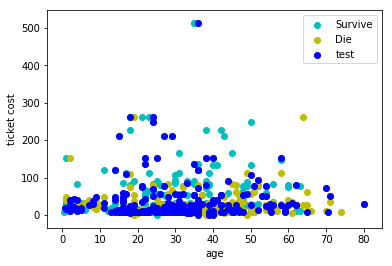

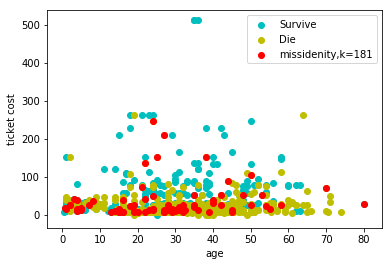

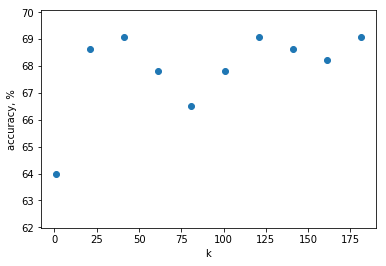

In [25]:
# initial data
fig = plt.figure()
print(Y.shape[0])
survive_count = 0
for k in np.arange(Y.shape[0]):
    if Y[k]==1:
        survive_count +=1
        
x1=np.zeros((survive_count,2))
x2=np.zeros((Y.shape[0]-survive_count,2))
count_x1 = 0
count_x2 = 0
for i in np.arange(Y.shape[0]):
    if Y[i]==1:
        x1[count_x1,0]=X[i,0]
        x1[count_x1,1]=X[i,1]
        count_x1 +=1
    else:
        x2[count_x2,0]=X[i,0]
        x2[count_x2,1]=X[i,1]
        count_x2 +=1

plt.scatter(x1[:, 0], x1[:, 1], color='c',label='Survive')
plt.scatter(x2[:, 0], x2[:, 1], color='y',label='Die')
plt.xlabel('age')
plt.ylabel('ticket cost')
# randomly selected data
plt.scatter(x_tst[:,0],x_tst[:,1],color='b',label='test')
plt.legend(loc='best')


# missidentifies for k = value
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], color='c', label='Survive')
plt.scatter(x2[:, 0], x2[:, 1], color='y', label='Die')
plt.scatter(ms[-1]['x'][:,0],ms[-1]['x'][:,1],color='r',label='missidenity,k=%d'%ms[-1]['k'])
plt.legend(loc='best')
plt.xlabel('age')
plt.ylabel('ticket cost')
plt.figure()

# accuracy plot
k = plt.scatter(res[:, 0], res[:, 1])
plt.ylim(min(res[:, 1]) - 2, max(res[:, 1])+1, 4)
plt.xlabel('k')
plt.ylabel('accuracy, %')
plt.show()